# Finite Differences for Boundary Value Problems

In [1]:
import numpy as np
import matplotlib.pyplot as pt

import scipy.sparse as sps

We'll solve

$u''+1000(1+x^2)u=0$ on $(-1,1)$

with $u(-1)=3$ and $u(1)=-3$.

In [2]:
#n = 9
n = 200

mesh = np.linspace(-1, 1, n)
h = mesh[1] - mesh[0]

In [3]:
A = sps.diags(
    [1,-2,1],
    offsets=[-1,0,1], 
    shape=(n, n))

if n < 10:
    print(A.todense())

Create `second_deriv` as a matrix to apply the second derivative. Can only do that for the interior points!

* change `shape` and offsets
* Take `h` into account

In [4]:
second_deriv = sps.diags(
    [1,-2,1],
    offsets=np.array([-1,0,1])+1,
    shape=(n-2, n))/h**2


if n < 10:
    print(second_deriv.todense())

In [5]:
factor = sps.diags(
    [1000*(1 + mesh[1:]**2)],
    offsets=[1],
    shape=(n-2, n))

if n < 10:
    print(mesh[1:-1])
    print()
    print(factor.todense())

In [6]:
A_int = second_deriv+factor

if n < 10:
    print(A_int.todense())

In [7]:
A = sps.vstack([
    sps.coo_matrix(([1], ([0],[0])), shape=(1, n)),
    A_int,
    sps.coo_matrix(([1], ([0],[n-1])), shape=(1, n)),
    ])
A = sps.csr_matrix(A)

if n < 10:
    print(A.todense())

Next, assemble the right-hand side as `rhs`:

Pay special attention to the boundary conditions. What entries of `rhs` do they correspond to?

In [8]:
rhs = np.zeros(n)
rhs[0] = 3
rhs[-1] = -3

To wrap up, solve and plot:

In [9]:
import scipy.sparse.linalg as sla

sol = sla.spsolve(A, rhs)

/usr/local/lib/python3.5/dist-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/usr/local/lib/python3.5/dist-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


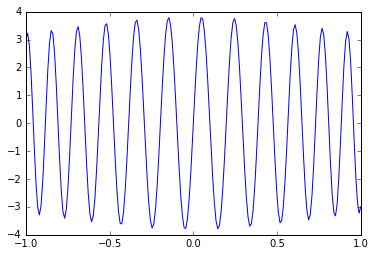

In [10]:
pt.plot(mesh, sol)